In [8]:
# Import Files

import mga
import ctrnn_leg
import leggedwalker
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Global parameters

duration = 200                  # Duration of evaluation (milliseconds)
stepsize = 0.1                  # Step Size (for time steps)
N = 3                           # Number of Neurons
WR = 16                         # Range of Weight values 
BR = 16                         # Range of Bias Values 
TMIN = 0.5                      # Time Constant Min
TMAX = 10.0                     # Time Constant Max

In [10]:
# Fitness Function

time = np.arange(0.0,duration,stepsize)

def fitnessFunction(genotype):
    
    ns = ctrnn_leg.CTRNN(N)
    ns.setParameters(genotype,WR,BR,TMIN,TMAX)
    ns.initializeState(np.zeros(N))
    body = leggedwalker.LeggedAgent()
    
    for t in time:
        ns.step(stepsize,body.out())
        body.step3(stepsize,ns.out3(),0)
    
    fit = body.cx/duration

    return fit

In [11]:
# Evolution Parameters 
popsize = 50
genesize = N*N + 3*N
recombProb = 0.5
mutatProb = 0.1
demesize = 50
generations = 50

In [12]:
# Initialize 
ga = mga.Microbial(fitnessFunction, popsize, genesize, recombProb, mutatProb, demesize, generations)


Average velocity = -1.5473525604909726e-05


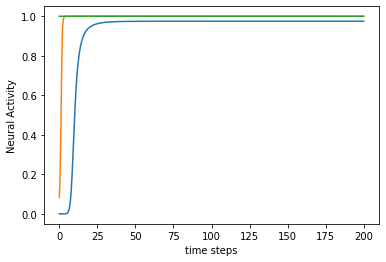

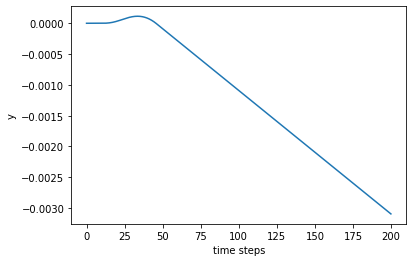

In [13]:
# Graph Initial Motion

avgfit, bestfit, bestind = ga.fitStats()
ns = ctrnn_leg.CTRNN(N)                     
ns.setParameters(bestind,WR,BR,TMIN,TMAX)
body = leggedwalker.LeggedAgent()

out_hist = np.zeros((len(time),N))
cx_hist = np.zeros(len(time))

i = 0
for t in time:
    ns.step(stepsize,body.out())
    body.step3(stepsize,ns.out3(),0)
    out_hist[i] = ns.Output
    cx_hist[i] = body.cx
    i+=1
print("Average velocity = " + str(body.cx/duration))

plt.plot(time, out_hist)
plt.xlabel("time steps")
plt.ylabel("Neural Activity")
plt.show()

plt.plot(time, cx_hist)
plt.xlabel("time steps")
plt.ylabel("y")
plt.show()

In [14]:
# Run Evolution 

ga.run()

starting
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


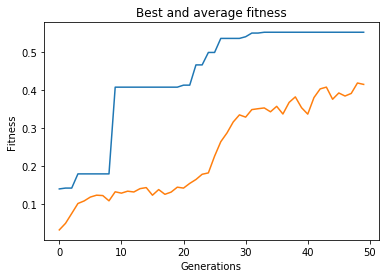

In [15]:
# Plot Evolution 

ga.showFitness()

Average velocity = 0.5519806042041839


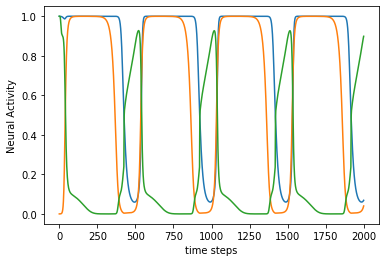

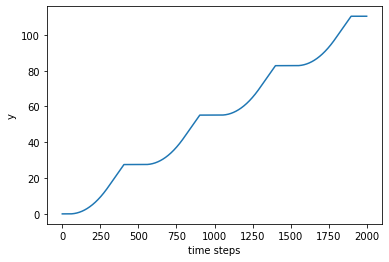

In [16]:
# Graph Final Motion

avgfit, bestfit, bestind = ga.fitStats()
ns = ctrnn_leg.CTRNN(N)                     
ns.setParameters(bestind,WR,BR,TMIN,TMAX)
body = leggedwalker.LeggedAgent()

out_hist = np.zeros((len(time),N))
cx_hist = np.zeros(len(time))

i = 0
for t in time:
    ns.step(stepsize,body.out())
    body.step3(stepsize,ns.out3(),0)
    out_hist[i] = ns.Output
    cx_hist[i] = body.cx
    i+=1
print("Average velocity = " + str(body.cx/duration))

plt.plot(out_hist)
plt.xlabel("time steps")
plt.ylabel("Neural Activity")
plt.show()

plt.plot(cx_hist)
plt.xlabel("time steps")
plt.ylabel("y")
plt.show()